<a href="https://colab.research.google.com/github/karinfaraujo/python-projects/blob/main/Python_para_ML_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Python para Machine Learning - 5**

##**LOC e ILOC**

In [ ]:
import pandas as pd

In [ ]:
url = 'https://raw.githubusercontent.com/ricardorocha86/Dados-Redes-Sociais/master/Social_Network_Ads.csv'
ads = pd.read_csv(url)
ads.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [ ]:
ads['Age'].mean()

37.655

In [ ]:
ads['Gender'] == 'Male'

0       True
1       True
2      False
3      False
4       True
       ...  
395    False
396     True
397    False
398     True
399    False
Name: Gender, Length: 400, dtype: bool

Comandos **loc** e **iloc**

O comando **loc** permite filtrar conjuntos de dados usando listas booleanas (comparadores) e acessar colunas pelo nome.

Sua sintaxe é a seguinte DataFrame.loc[ linhas , colunas ]

e é similar ao uso de DataFrame[ colunas ][ linhas ].


In [ ]:
ads[ads['Gender'] == 'Male']['Age'].mean()

36.86734693877551

In [ ]:
ads[ads['Gender'] == 'Female']['Age'].mean()

38.411764705882355

In [ ]:
ads.loc[ads['Gender'] == 'Male','Purchased'].mean()

0.336734693877551

In [ ]:
ads.loc[ads['Gender'] == 'Female','Purchased'].mean()

0.37745098039215685

O comando **iloc** é utilizado quando queremos buscar em um conjunto de dados pelo índice número (iloc = index location).

In [ ]:
ads.iloc[0:10, :]

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
5,15728773,Male,27.0,58000.0,0
6,15598044,Female,27.0,84000.0,0
7,15694829,Female,32.0,150000.0,1
8,15600575,Male,25.0,33000.0,0
9,15727311,Female,35.0,65000.0,0


In [ ]:
ads[ads['Gender'] == 'Female']['EstimatedSalary'].mean()

71759.80392156863

In [ ]:
ads[ads['Gender'] == 'Male']['EstimatedSalary'].mean()

67642.85714285714

In [ ]:
ads[ads['Purchased'] == 0]['Age'].mean()

32.793774319066145

In [ ]:
ads[ads['Purchased'] == 1]['Age'].mean()

46.39160839160839

In [ ]:
ads[ads['Purchased'] == 0]['EstimatedSalary'].mean()

60544.74708171206

In [ ]:
ads[ads['Purchased'] == 1]['EstimatedSalary'].mean()

86272.72727272728

<Axes: ylabel='Gender'>

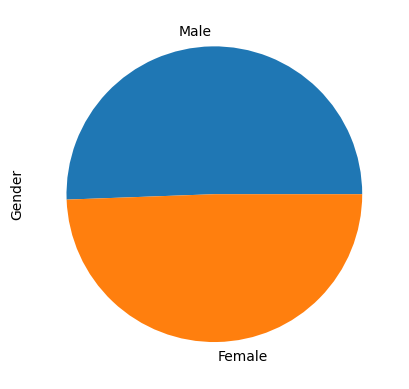

In [ ]:
ads[ads['Purchased'] == 0]['Gender'].value_counts().plot(kind = 'pie')

<Axes: ylabel='Gender'>

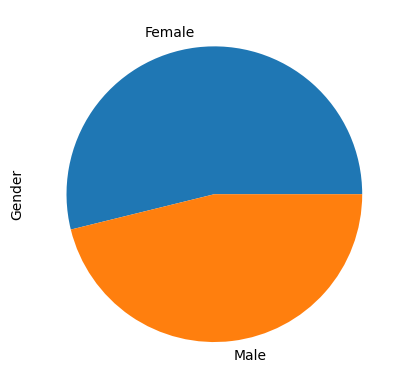

In [ ]:
ads[ads['Purchased'] == 1]['Gender'].value_counts().plot(kind = 'pie')

##**GroupBy**

É útil quando queremos agregar uma informação e ter o seu resumo por grupos.

In [ ]:
ads['Age'].groupby(ads['Gender']).mean()

Gender
Female    38.411765
Male      36.867347
Name: Age, dtype: float64

In [ ]:
ads.groupby(ads['Gender']).mean()

,User ID,Age,EstimatedSalary,Purchased
Gender,,,,
Female,1.569331e+07,38.411765,71759.803922,0.377451
Male,1.568970e+07,36.867347,67642.857143,0.336735


In [ ]:
ads.groupby(ads['Gender']).max()

,User ID,Age,EstimatedSalary,Purchased
Gender,,,,
Female,15815236,60.0,150000.0,1
Male,15814816,60.0,150000.0,1


In [ ]:
ads.groupby(ads['Gender']).describe()

User ID                                                       \
         count          mean           std         min          25%   
Gender                                                                
Female   204.0  1.569331e+07  73025.769592  15566689.0  15624274.50   
Male     196.0  1.568970e+07  70346.177439  15570932.0  15628197.25   

                                              Age             ...  \
               50%         75%         max  count       mean  ...   
Gender                                                        ...   
Female  15695254.0  15757990.5  15815236.0  204.0  38.411765  ...   
Male    15689588.0  15744341.5  15814816.0  196.0  36.867347  ...   

       EstimatedSalary           Purchased                                     \
                   75%       max     count      mean       std  min  25%  50%   
Gender                                                                          
Female         90750.0  150000.0     204.0  0.377451  0.485942  0.0  0.0  0.0   
Male           86000.0  150000.0     196.0  0.336735  0.473804  0.0  0.0  0.0   

                  
        75%  max  
Gender            
Female  1.0  1.0  
Male    1.0  1.0  

[2 rows x 32 columns]

In [ ]:
ads[['Age','EstimatedSalary']].groupby(ads['Purchased']).describe()

Age                                                     \
           count       mean       std   min   25%   50%   75%   max   
Purchased                                                             
0          257.0  32.793774  7.985844  18.0  26.0  34.0  38.0  59.0   
1          143.0  46.391608  8.612172  27.0  39.5  47.0  53.0  60.0   

          EstimatedSalary                                                \
                    count          mean           std      min      25%   
Purchased                                                                 
0                   257.0  60544.747082  24351.570102  15000.0  44000.0   
1                   143.0  86272.727273  42064.200064  20000.0  41000.0   

                                        
               50%       75%       max  
Purchased                               
0          61000.0   77000.0  141000.0  
1          90000.0  122500.0  150000.0

In [ ]:
ads[['Age','EstimatedSalary']].groupby(ads['Purchased']).mean()

,Age,EstimatedSalary
Purchased,,
0,32.793774,60544.747082
1,46.391608,86272.727273


In [ ]:
ads[['Age','EstimatedSalary']].groupby([ads['Purchased'], ads['Gender']]).mean()

Age  EstimatedSalary
Purchased Gender                            
0         Female  33.110236     61480.314961
          Male    32.484615     59630.769231
1         Female  47.155844     88714.285714
          Male    45.500000     83424.242424

In [ ]:
ads[['Age','EstimatedSalary']].groupby([ads['Purchased'], ads['Gender']]).describe()

Age                                                     \
                  count       mean       std   min   25%   50%   75%   max   
Purchased Gender                                                             
0         Female  127.0  33.110236  8.468643  18.0  27.0  33.0  39.0  59.0   
          Male    130.0  32.484615  7.504246  18.0  26.0  34.5  38.0  49.0   
1         Female   77.0  47.155844  8.463645  27.0  42.0  48.0  53.0  60.0   
          Male     66.0  45.500000  8.762244  28.0  39.0  46.0  50.5  60.0   

                 EstimatedSalary                                       \
                           count          mean           std      min   
Purchased Gender                                                        
0         Female           127.0  61480.314961  25248.243816  15000.0   
          Male             130.0  59630.769231  23504.292355  15000.0   
1         Female            77.0  88714.285714  43123.097103  20000.0   
          Male              66.0  83424.242424  40937.122745  20000.0   

                                                        
                      25%      50%       75%       max  
Purchased Gender                                        
0         Female  44000.0  62000.0   79000.0  134000.0  
          Male    43500.0  60500.0   76750.0  141000.0  
1         Female  41000.0  96000.0  130000.0  150000.0  
          Male    41250.0  87500.0  117750.0  150000.0

Ao fazer uma estimação de quem vai comprar pelo anúncio, baseado nessa análise de dados, o que seria razoável, sem fazer modelagem alguma?

<Axes: >

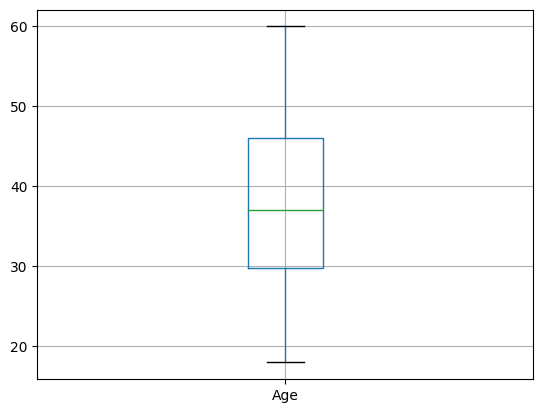

In [ ]:
ads.boxplot(column = ['Age'])

<Axes: title={'center': 'Age'}, xlabel='Purchased'>

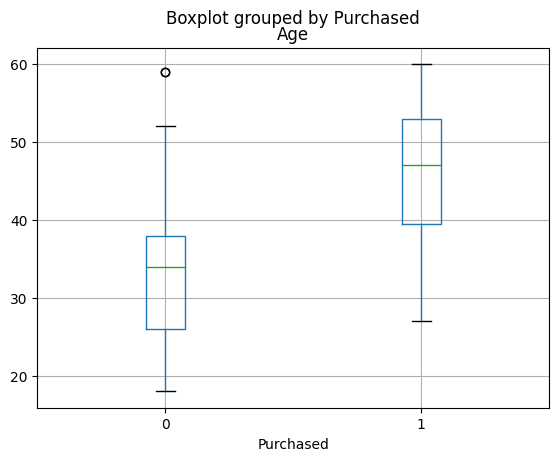

In [ ]:
ads.boxplot(column = ['Age'], by = 'Purchased')

<Axes: title={'center': 'EstimatedSalary'}, xlabel='Purchased'>

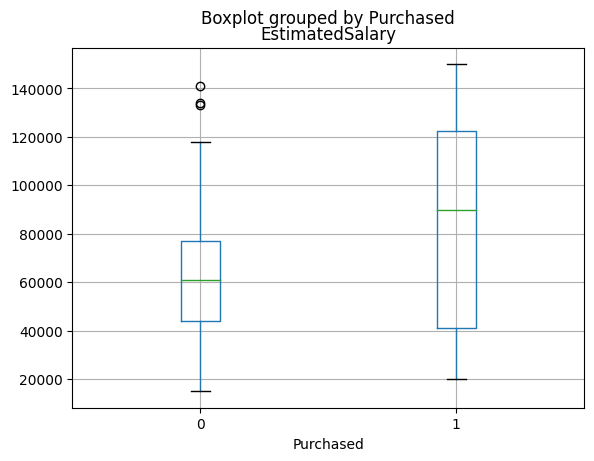

In [ ]:
ads.boxplot(column = ['EstimatedSalary'], by = 'Purchased')

### Testes para verificar qual deles tem maior acertividade!

Teste 1: Inferir como comprador aqueles que tem idade acima da média.

In [ ]:
def aux(x):
    if x > ads['Age'].mean():
        return 1
    else:
        return 0

ads['Teste1'] = ads['Age'].apply(aux)
ads.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Teste1
0,15624510,Male,19.0,19000.0,0,0
1,15810944,Male,35.0,20000.0,0,0
2,15668575,Female,26.0,43000.0,0,0
3,15603246,Female,27.0,57000.0,0,0
4,15804002,Male,19.0,76000.0,0,0


In [ ]:
ads['Purchased'] == ads['Teste1']

0      True
1      True
2      True
3      True
4      True
       ... 
395    True
396    True
397    True
398    True
399    True
Length: 400, dtype: bool

In [ ]:
ads['Purchased'].groupby(ads['Teste1']).mean()

Teste1
0    0.138095
1    0.600000
Name: Purchased, dtype: float64

Teste 2: Se o salário estimado for acima da média, então a pessoa é compradora, caso contrário, não é.

In [ ]:
ads['Teste2'] = 0
ads.loc[ads['EstimatedSalary'] > ads['EstimatedSalary'].mean(),'Teste2'] = 1
ads.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Teste1,Teste2
0,15624510,Male,19.0,19000.0,0,0,0
1,15810944,Male,35.0,20000.0,0,0,0
2,15668575,Female,26.0,43000.0,0,0,0
3,15603246,Female,27.0,57000.0,0,0,0
4,15804002,Male,19.0,76000.0,0,0,1


In [ ]:
ads['Purchased'].groupby(ads['Teste2']).mean()

Teste2
0    0.236181
1    0.477612
Name: Purchased, dtype: float64

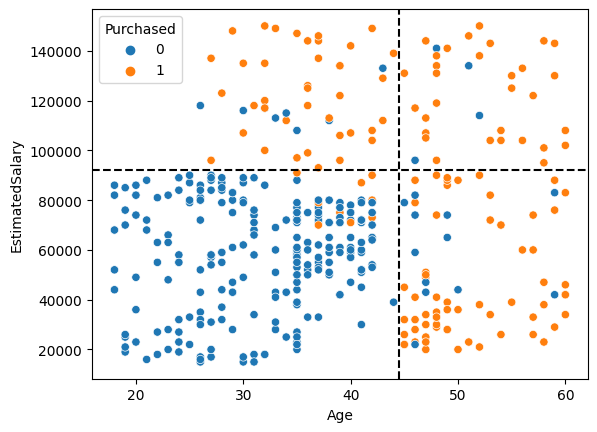

In [ ]:
# Gráfico
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x = ads['Age'], y = ads['EstimatedSalary'], hue = ads['Purchased'])
plt.axhline(92000, color = 'black', linestyle = 'dashed')
plt.axvline(44.5, color = 'black', linestyle = 'dashed')

Teste 3: Se a idade for maior que 44.5 ou o salário estimado for acima de 90000, então a pessoa é compradora, caso contrário, não é.

In [ ]:
ads['Teste3'] = 1
ads.loc[(ads['Age'] < 44.5) & (ads['EstimatedSalary'] < 92000), 'Teste3'] = 0

In [ ]:
ads['Purchased'].groupby(ads['Teste3']).mean()

Teste3
0    0.041152
1    0.847134
Name: Purchased, dtype: float64

## Calculando a ACURÁCIA (TAXA DE ACERTO)

In [ ]:
(ads['Purchased'] == ads['Teste1']).mean()

0.7375

In [ ]:
(ads['Purchased'] == ads['Teste2']).mean()

0.62

In [ ]:
(ads['Purchased'] == ads['Teste3']).mean()

0.915

## **Conclusão:** Um preditor com 91,5% de acerto para a variável Purchased é dizer que uma pessoa é compradora se sua idade for maior que 45 anos ou se seu salário estimado for superior a $ 92000, e não compradora no caso contrário.